<a href="https://colab.research.google.com/github/lry0830/PillSegregation/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Preparation


In [1]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Install prerequisites
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
rootDir = "/content/gdrive/MyDrive/Pills/"
workspaceDir = "/content/Pills"

In [5]:
# Train-Test split (70-20-10) directly as there is no data scarcity
import splitfolders

splitfolders.ratio(rootDir, output=workspaceDir, seed=42, ratio=(0.7, 0.2, 0.1))

Copying files: 890 files [00:12, 68.73 files/s] 


### Clone Repository

In [ ]:
%cd "/content"
!git clone https://github.com/lry0830/PillSegregation.git

### Model Training


In [6]:
# make directory to store model weights
!mkdir "/content/weights"

In [20]:
# Get to work directory
%cd "/content/PillSegregation"

/content/PillSegregation


In [10]:
%run train.py --datadir "/content/Pills" --device "cuda" --epochs 30

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Classes:['contamination', 'crack', 'good']
Epoch 0/29
----------
train Loss: 0.4018 Acc: 0.8395
val Loss: 0.0315 Acc: 1.0000

Epoch 1/29
----------
train Loss: 0.2173 Acc: 0.9230
val Loss: 6.6000 Acc: 0.6629

Epoch 2/29
----------
train Loss: 0.1810 Acc: 0.9390
val Loss: 1.9487 Acc: 0.6685

Epoch 3/29
----------
train Loss: 0.1532 Acc: 0.9518
val Loss: 0.0005 Acc: 1.0000

Epoch 4/29
----------
train Loss: 0.1010 Acc: 0.9775
val Loss: 4.1929 Acc: 0.3371

Epoch 5/29
----------
train Loss: 0.0538 Acc: 0.9888
val Loss: 0.0453 Acc: 0.9944

Epoch 6/29
----------
train Loss: 0.1285 Acc: 0.9679
val Loss: 4.6806 Acc: 0.5562

Epoch 7/29
----------
train Loss: 0.0644 Acc: 0.9823
val Loss: 0.0013 Acc: 1.0000

Epoch 8/29
----------
train Loss: 0.0542 Acc: 0.9872
val Loss: 0.0080 Acc: 1.0000

Epoch 9/29
----------
train Loss: 0.0911 Acc: 0.9743
val Loss: 0.0007 Acc: 1.0000

Epoch 10/29
----------
train Loss: 0.0337 Acc: 0.9872
val Loss: 0.0010 Acc: 1.0000

Epoch 11/29
----------
train Loss: 0.0562 A

### Model Evaluation & Inference
Two available options:
- Use trained weights in Github (best_model_30.pt)
- Use newly trained weights (best_model_*epoch*.pt)


Classes:['contamination', 'crack', 'good']


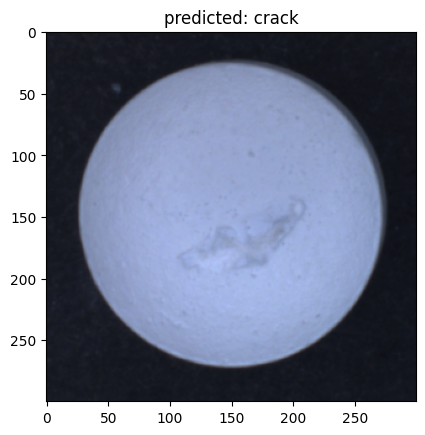

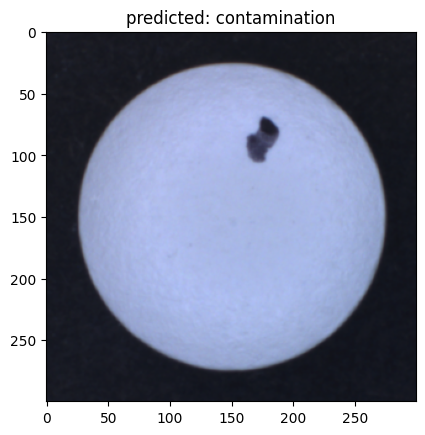

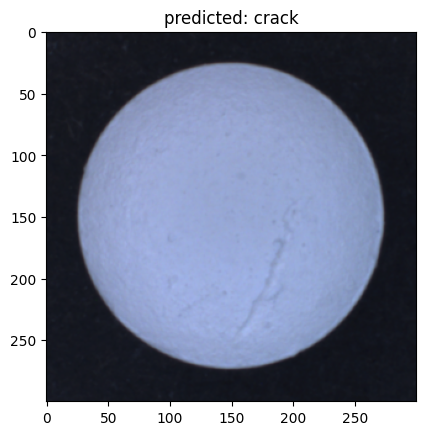

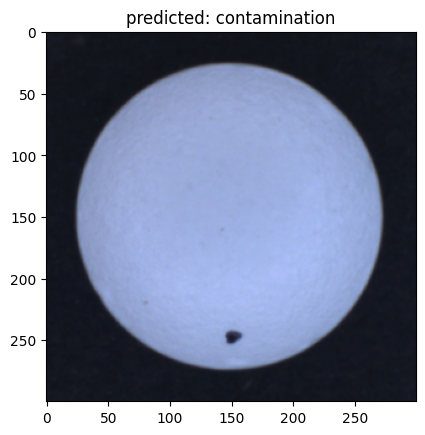

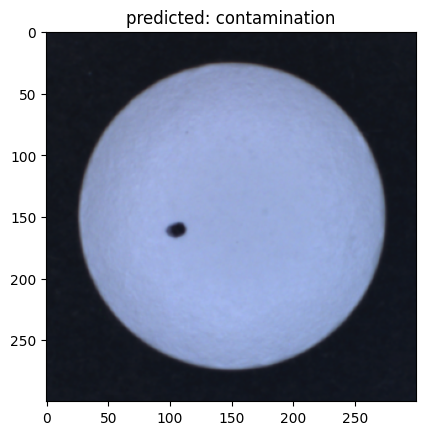

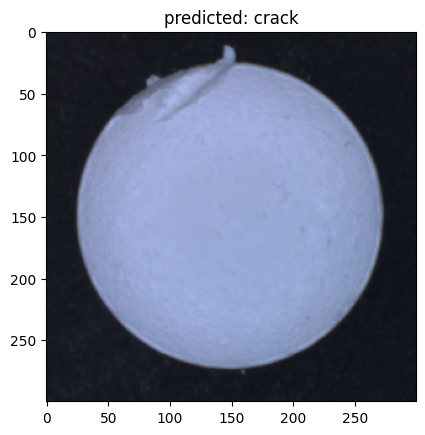

<Figure size 640x480 with 0 Axes>

In [24]:
%run detect.py --weights "/content/PillSegregation/best_model_30.pt" \
               --datadir "/content/Pills" \
               --numimages 6